Message entered is: 110001
Sending data to server...
Data sent to server...
----------------------------------
Response gotten from server...
Manchester Encoded message: 101001010110011010101001
Drawing Time Diagram for Manchester Encoding...


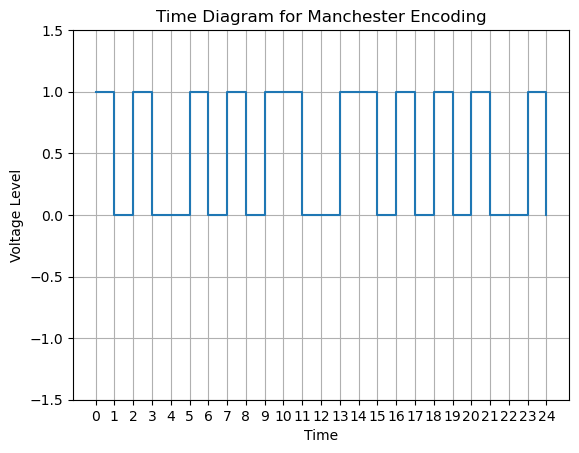

------------------------------------


KeyboardInterrupt: 

In [1]:
import socket
import matplotlib.pyplot as plt

def draw_timing_diagram(encoded_data, encoding):
    x = []
    y = []

    current_time=0
    for bit in encoded_data:
        x.append(current_time)
        # x.append(current_time+0.5)
        if bit=='0':
            y.append(0)
            # y.append(0)
        else:
            y.append(1)
            # y.append(1)
        current_time+=1
        
    x.append(x[-1] + 1)
    y.append(1 - y[-1])

    title=f"Time Diagram for {encoding} Encoding"
    plt.step(x, y, where='post')
    plt.xticks(ticks=[i for i in range(max(x) + 1)])
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Voltage Level')
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.show()

def main():
    # Set up the client
    client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    client_socket.connect(('localhost', 9999))

    while True:
        data = input("Enter the message to be transmitted: ")
        print("Message entered is:", data)
        print("Sending data to server...")
        client_socket.send(data.encode())
        print("Data sent to server...")
        print("----------------------------------")
        print("Response gotten from server...")
        manchester_encoded_data = client_socket.recv(1024).decode()
        print("Manchester Encoded message:", manchester_encoded_data)

        print("Drawing Time Diagram for Manchester Encoding...")
        draw_timing_diagram(manchester_encoded_data, "Manchester")

        print("------------------------------------")

        differential_manchester_encoded_data = client_socket.recv(1024).decode()
        print("Differential Manchester Encoded message:", differential_manchester_encoded_data)

        print("Drawing Time Diagram for Differential Manchester Encoding...")
        draw_timing_diagram(differential_manchester_encoded_data, "Differential Manchester")

        choice = input("Do you want to exit: (yes/no): ")
        if choice.lower() == "yes":
            print("Exiting...")
            break

    client_socket.close()


if __name__ == "__main__":
    main()